<a href="https://colab.research.google.com/github/camellikna/Camellia/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving df (2).csv to df (2) (2).csv


# Import Libraries

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

#Read the Data

In [ ]:
df = pd.read_csv('df (2).csv')

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


# Data Understanding



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [ ]:
df.describe()

,Rating
count,5892.000000
mean,3.244603
std,1.660970
min,-1.000000
25%,3.300000
50%,3.800000
75%,4.100000
max,5.000000


In [ ]:
df = df[df['Salary Estimate'] != '-1']

In [ ]:
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$',' '))

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K',' '))

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())

In [ ]:
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])

In [ ]:
df['Min_salary']=df['Min_salary'].astype(int)

In [ ]:
df['Max_salary']=df['Max_salary'].astype(int)

# Calculate AVG

In [ ]:
df['AVG'] = (df['Max_salary']+df['Min_salary'])/2

In [ ]:
df['State']=df['Location'].apply(lambda x: x.split()[-1])

In [ ]:
set(df['State'])

{'AZ',
 'CA',
 'DC',
 'DE',
 'FL',
 'GA',
 'IL',
 'IN',
 'KY',
 'Kingdom',
 'MA',
 'MD',
 'ME',
 'MI',
 'NC',
 'NH',
 'NJ',
 'NM',
 'NY',
 'OH',
 'PA',
 'TX',
 'VA',
 'WI'}

In [ ]:
df = df[df['State']!='Kingdom']

In [ ]:
def title_organizer(x):
        """
        This function organizes the job title
        """
        x = x.lower()
        if ('data scientist' in x) or ('data science' in x) :
            return 'data scientist'
        elif 'data engineer' in x:
            return 'data engineer'
        elif 'deep learning' in x:
            return 'deep learning engineer'
        elif 'machine learning' in x:
            return 'machine learning engineer'
        elif 'director' in x:
            return 'director'
        elif 'manager' in x:
            return 'manager'
        elif 'analyst' in x:
            return 'analyst'
        elif 'researcher' in x:
            return 'researcher'
        else:
            return 'other'

In [ ]:
df['Job Title'] = df['Job Title'].apply(title_organizer)

<ipython-input-61-9cd884ef4483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].apply(title_organizer)


In [ ]:
df = df[df['Rating']!= '-1']

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_salary,Max_salary,AVG,State
0,data scientist,"[111, -, 181, (Glassdoor, est.)]",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,111,181,146.0,NY
1,data scientist,"[111, -, 181, (Glassdoor, est.)]",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,111,181,146.0,NY
2,data scientist,"[111, -, 181, (Glassdoor, est.)]",-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,111,181,146.0,NY
3,analyst,"[111, -, 181, (Glassdoor, est.)]",3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,111,181,146.0,NJ
4,data scientist,"[111, -, 181, (Glassdoor, est.)]",3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,111,181,146.0,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,other,"[38, -, 64, (Glassdoor, est.)]",3.2,CAS\n3.2,"Columbus, OH",1001 to 5000 Employees,1907,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),38,64,51.0,OH
5882,other,"[47, -, 89, (Glassdoor, est.)]",4.2,Centers for Disease Control and Prevention\n4.2,"Cincinnati, OH",10000+ Employees,1946,Government,Federal Agencies,Government,Unknown / Non-Applicable,47,89,68.0,OH
5883,other,"[66, -, 113, (Glassdoor, est.)]",4.0,Certara\n4.0,"Cincinnati, OH",501 to 1000 Employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,66,113,89.5,OH
5886,analyst,"[67, -, 111, (Glassdoor, est.)]",4.0,New Relic\n4.0,"Cincinnati, OH",1001 to 5000 Employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),67,111,89.0,OH


In [ ]:
cleaned_df = df[['Job Title', 'Rating', 'AVG', 'State']]

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5496 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Job Title  5496 non-null   object 
 1   Rating     5496 non-null   float64
 2   AVG        5496 non-null   float64
 3   State      5496 non-null   object 
dtypes: float64(2), object(2)
memory usage: 214.7+ KB


# Data Visualization

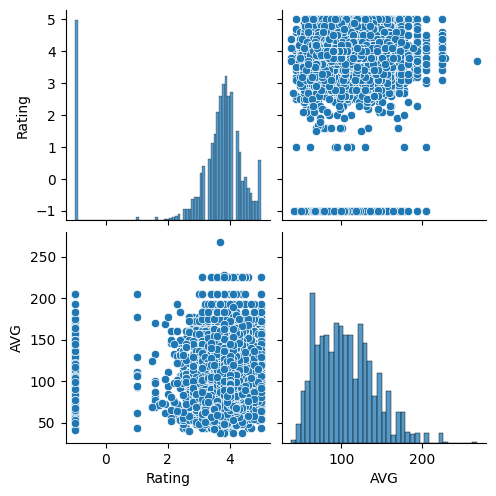

In [ ]:
sns.pairplot(cleaned_df)

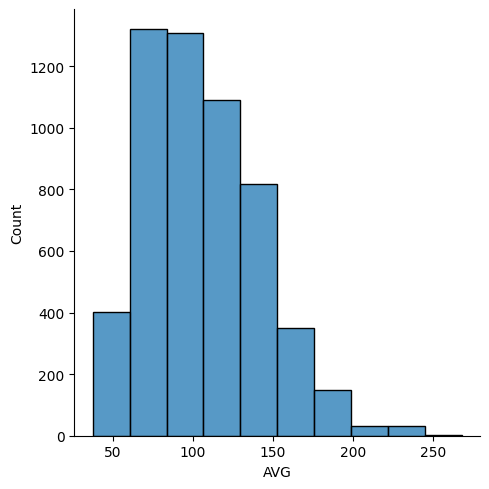

In [ ]:
sns.displot(x='AVG', data= cleaned_df, bins = 10)

<Axes: xlabel='Rating', ylabel='AVG'>

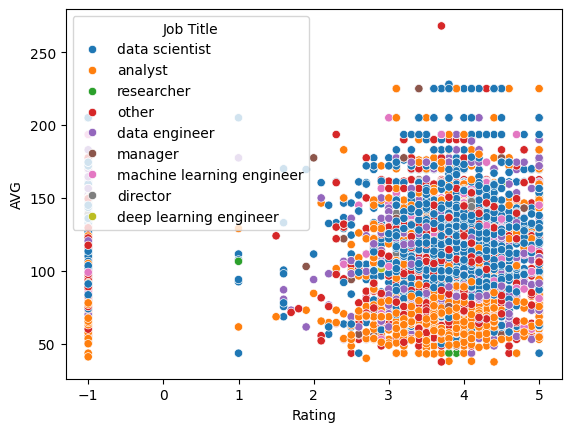

In [ ]:
sns.scatterplot(x='Rating',y='AVG',data=cleaned_df,hue='Job Title')

# Make Dummies

In [ ]:
preprocessed_df=pd.get_dummies(cleaned_df, columns = ['State','Job Title'])

In [ ]:
preprocessed_df

,Rating,AVG,State_AZ,State_CA,State_DC,State_DE,State_FL,State_GA,State_IL,State_IN,...,State_WI,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,Job Title_researcher
0,3.5,146.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4.5,146.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.0,146.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3.4,146.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3.4,146.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,3.2,51.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5882,4.2,68.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5883,4.0,89.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5886,4.0,89.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Modeling

In [ ]:
preprocessed_df['AVG'].median()

101.5

In [ ]:
def sat(x):
  if x>101.5:
    return(1)
  else:
    return(0)

In [ ]:
preprocessed_df['Satisfied']=preprocessed_df['AVG'].apply(sat)

In [ ]:
preprocessed_df[['AVG','Satisfied']]

,AVG,Satisfied
0,146.0,1
1,146.0,1
2,146.0,1
3,146.0,1
4,146.0,1
...,...,...
5881,51.0,0
5882,68.0,0
5883,89.5,0
5886,89.0,0


In [ ]:
X = preprocessed_df.drop(columns=['AVG','Satisfied'])

In [ ]:
y= preprocessed_df['Satisfied']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.3 , random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
prediction = logreg.predict(x_test)

In [ ]:
prediction

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test

3585    0
4598    1
3949    0
3400    1
5136    0
       ..
479     1
2605    0
4483    0
2566    0
5635    0
Name: Satisfied, Length: 1649, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,prediction)

array([[570, 253],
       [258, 568]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       823
           1       0.69      0.69      0.69       826

    accuracy                           0.69      1649
   macro avg       0.69      0.69      0.69      1649
weighted avg       0.69      0.69      0.69      1649



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, prediction)

0.6901152213462705

# Save Model

In [ ]:
pickle.dump(logreg, open('SalarySatisfaction_Estimater.pkl' , 'wb'))